In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

In [3]:
tr_columns = ['S','L','D']
gd_columns = ['H','W','SW','VW','ShW']
df = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns)
tf = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols='R')

In [4]:
def sex_class(value):
    if value == 'M':
        return 1
    elif value == 'F':
        return 2
    else:
        return 3
    
def age_class(value):
    if value == 1:
        return 'Young'
    elif value == 2:
        return 'Middle-Aged'
    else:
        return 'Old'

In [5]:
gnb = GaussianNB()

In [6]:
data_file = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns)
data_file_2 = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns + gd_columns)
data_file['S'] = data_file['S'].apply(sex_class, 'S')



In [7]:
def problem_solver(tr_set_count, file_name):
    
    tr_set = np.array(data_file[:tr_set_count])
    target = tf[:tr_set_count]
    val_set = np.array(data_file[tr_set_count + 1:])
    val_target = tf[tr_set_count + 1:]
    
    y_fit = gnb.fit(tr_set, target)
    y_pred = y_fit.predict(val_set)
    y_score = gnb.score(tr_set, target)
    con_matrix = confusion_matrix(val_target, y_pred)
    
    return y_pred, con_matrix, y_score

In [10]:
 y_fit1_1,con_matrix1_1, y_score1_1  = problem_solver(100, data_file)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


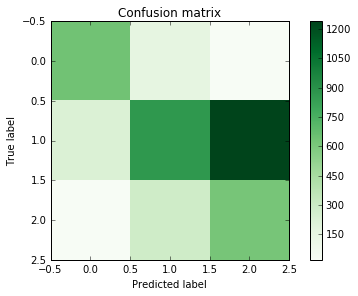

In [12]:
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(con_matrix1_1) # part 1.1's confussion matrix

In [13]:
print "1.1's accuracy is %s" % str(y_score1_1)

1.1's accuracy is 0.69


In [14]:
 y_fit1_2,con_matrix1_2, y_score1_2  = problem_solver(1000, data_file)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


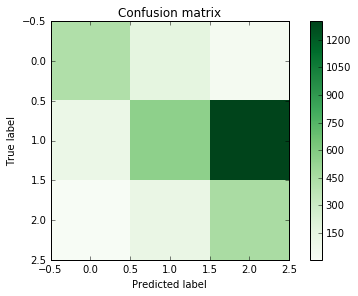

In [15]:
plot_confusion_matrix(con_matrix1_2) # part 1.2's confussion matrix

In [16]:
print "1.2's accuracy is %s" % str(y_score1_2)

1.2's accuracy is 0.638


In [17]:
 y_fit1_3,con_matrix1_3, y_score1_3  = problem_solver(2000, data_file)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


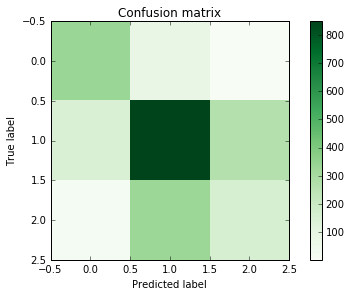

In [18]:
plot_confusion_matrix(con_matrix1_3) # part 1.3's confussion matrix

In [19]:
print "1.3's accuracy is %s" % str(y_score1_3)

1.3's accuracy is 0.633


In [20]:
 y_fit2_1,con_matrix2_1, y_score2_1  = problem_solver(100, data_file_2)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


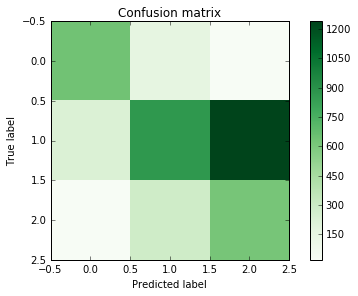

In [21]:
plot_confusion_matrix(con_matrix2_1) # part 2.1's confussion matrix

In [22]:
print "2.1's accuracy is %s" % str(y_score2_1)

2.1's accuracy is 0.69


In [23]:
 y_fit2_2,con_matrix2_2, y_score2_2  = problem_solver(1000, data_file_2)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


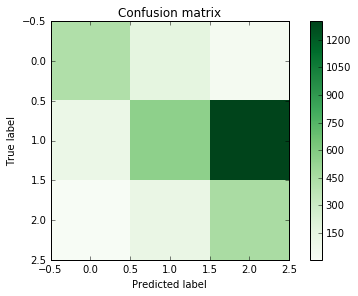

In [24]:
plot_confusion_matrix(con_matrix2_2) # part 2.2's confussion matrix

In [25]:
print "2.2's accuracy is %s" % str(y_score2_2)

2.2's accuracy is 0.638


In [26]:
 y_fit2_3,con_matrix2_3, y_score2_3  = problem_solver(2000, data_file_2)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


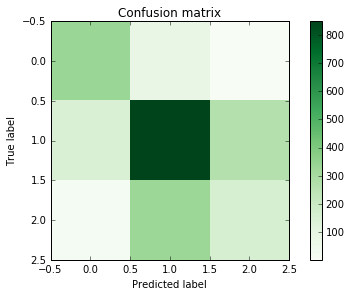

In [27]:
plot_confusion_matrix(con_matrix2_3) # part 2.3's confussion matrix

In [28]:
print "2.3's accuracy is %s" % str(y_score2_3)

2.3's accuracy is 0.633


In [31]:
con_matrixes = [con_matrix1_1, con_matrix1_2, con_matrix1_3, con_matrix2_1, con_matrix2_2, con_matrix2_3]

In [32]:
for matrix in con_matrixes:
    print matrix

[[ 636  164   20]
 [ 220  871 1239]
 [  24  286  616]]
[[ 427  164   33]
 [ 114  558 1301]
 [   4  125  450]]
[[334  83   1]
 [145 849 269]
 [ 15 326 154]]
[[ 636  164   20]
 [ 220  871 1239]
 [  24  286  616]]
[[ 427  164   33]
 [ 114  558 1301]
 [   4  125  450]]
[[334  83   1]
 [145 849 269]
 [ 15 326 154]]
